### 1. Data Understanding and Exploration

In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [360]:
#Data set 
house = pd.read_csv("train.csv", na_values="NAN")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [361]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [362]:
# To get the description of the dataset
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [363]:
#checking duplicates
sum(house.duplicated(subset = 'Id')) == 0

True

In [364]:
# Checking for percentage nulls
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [365]:
#Checking for outlier in the numerical columns
house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

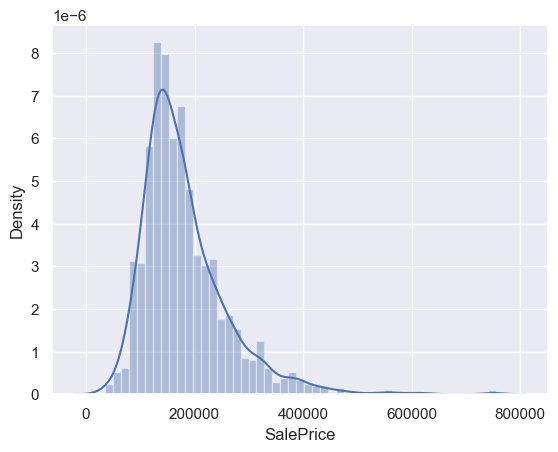

In [366]:
#salePrice plot
sns.distplot(house['SalePrice'])

In [367]:
print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


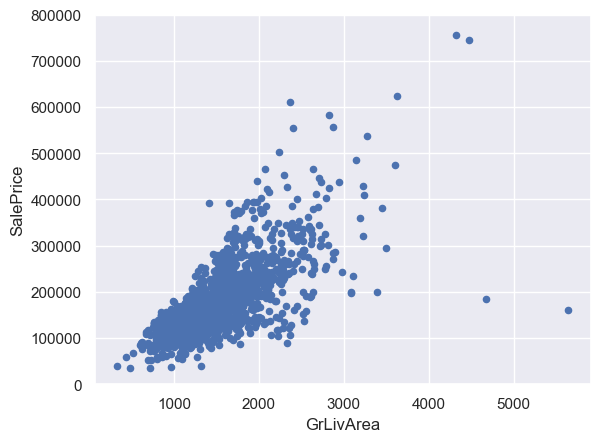

In [368]:
var = 'GrLivArea'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


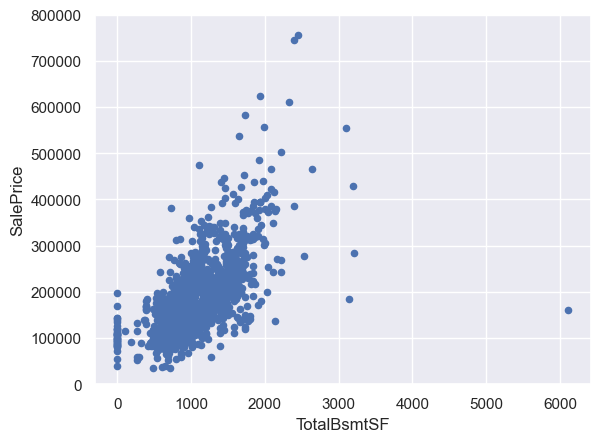

In [369]:
var = 'TotalBsmtSF'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<AxesSubplot:xlabel='SalePrice'>

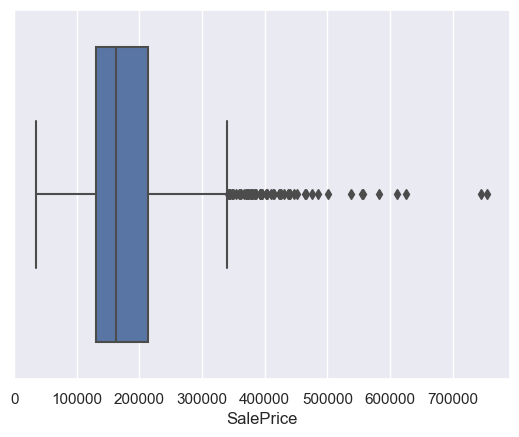

In [370]:
sns.boxplot(data['SalePrice'])

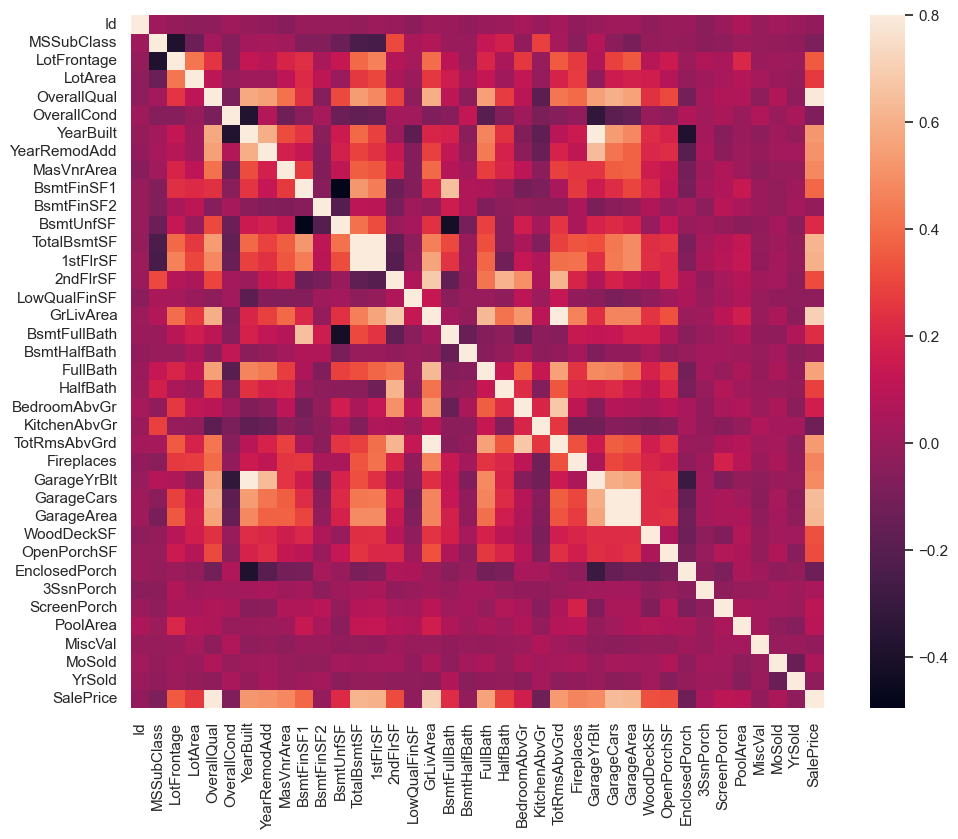

In [371]:
#correlation matrix
corelationVar = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corelationVar, vmax=.8, square=True);

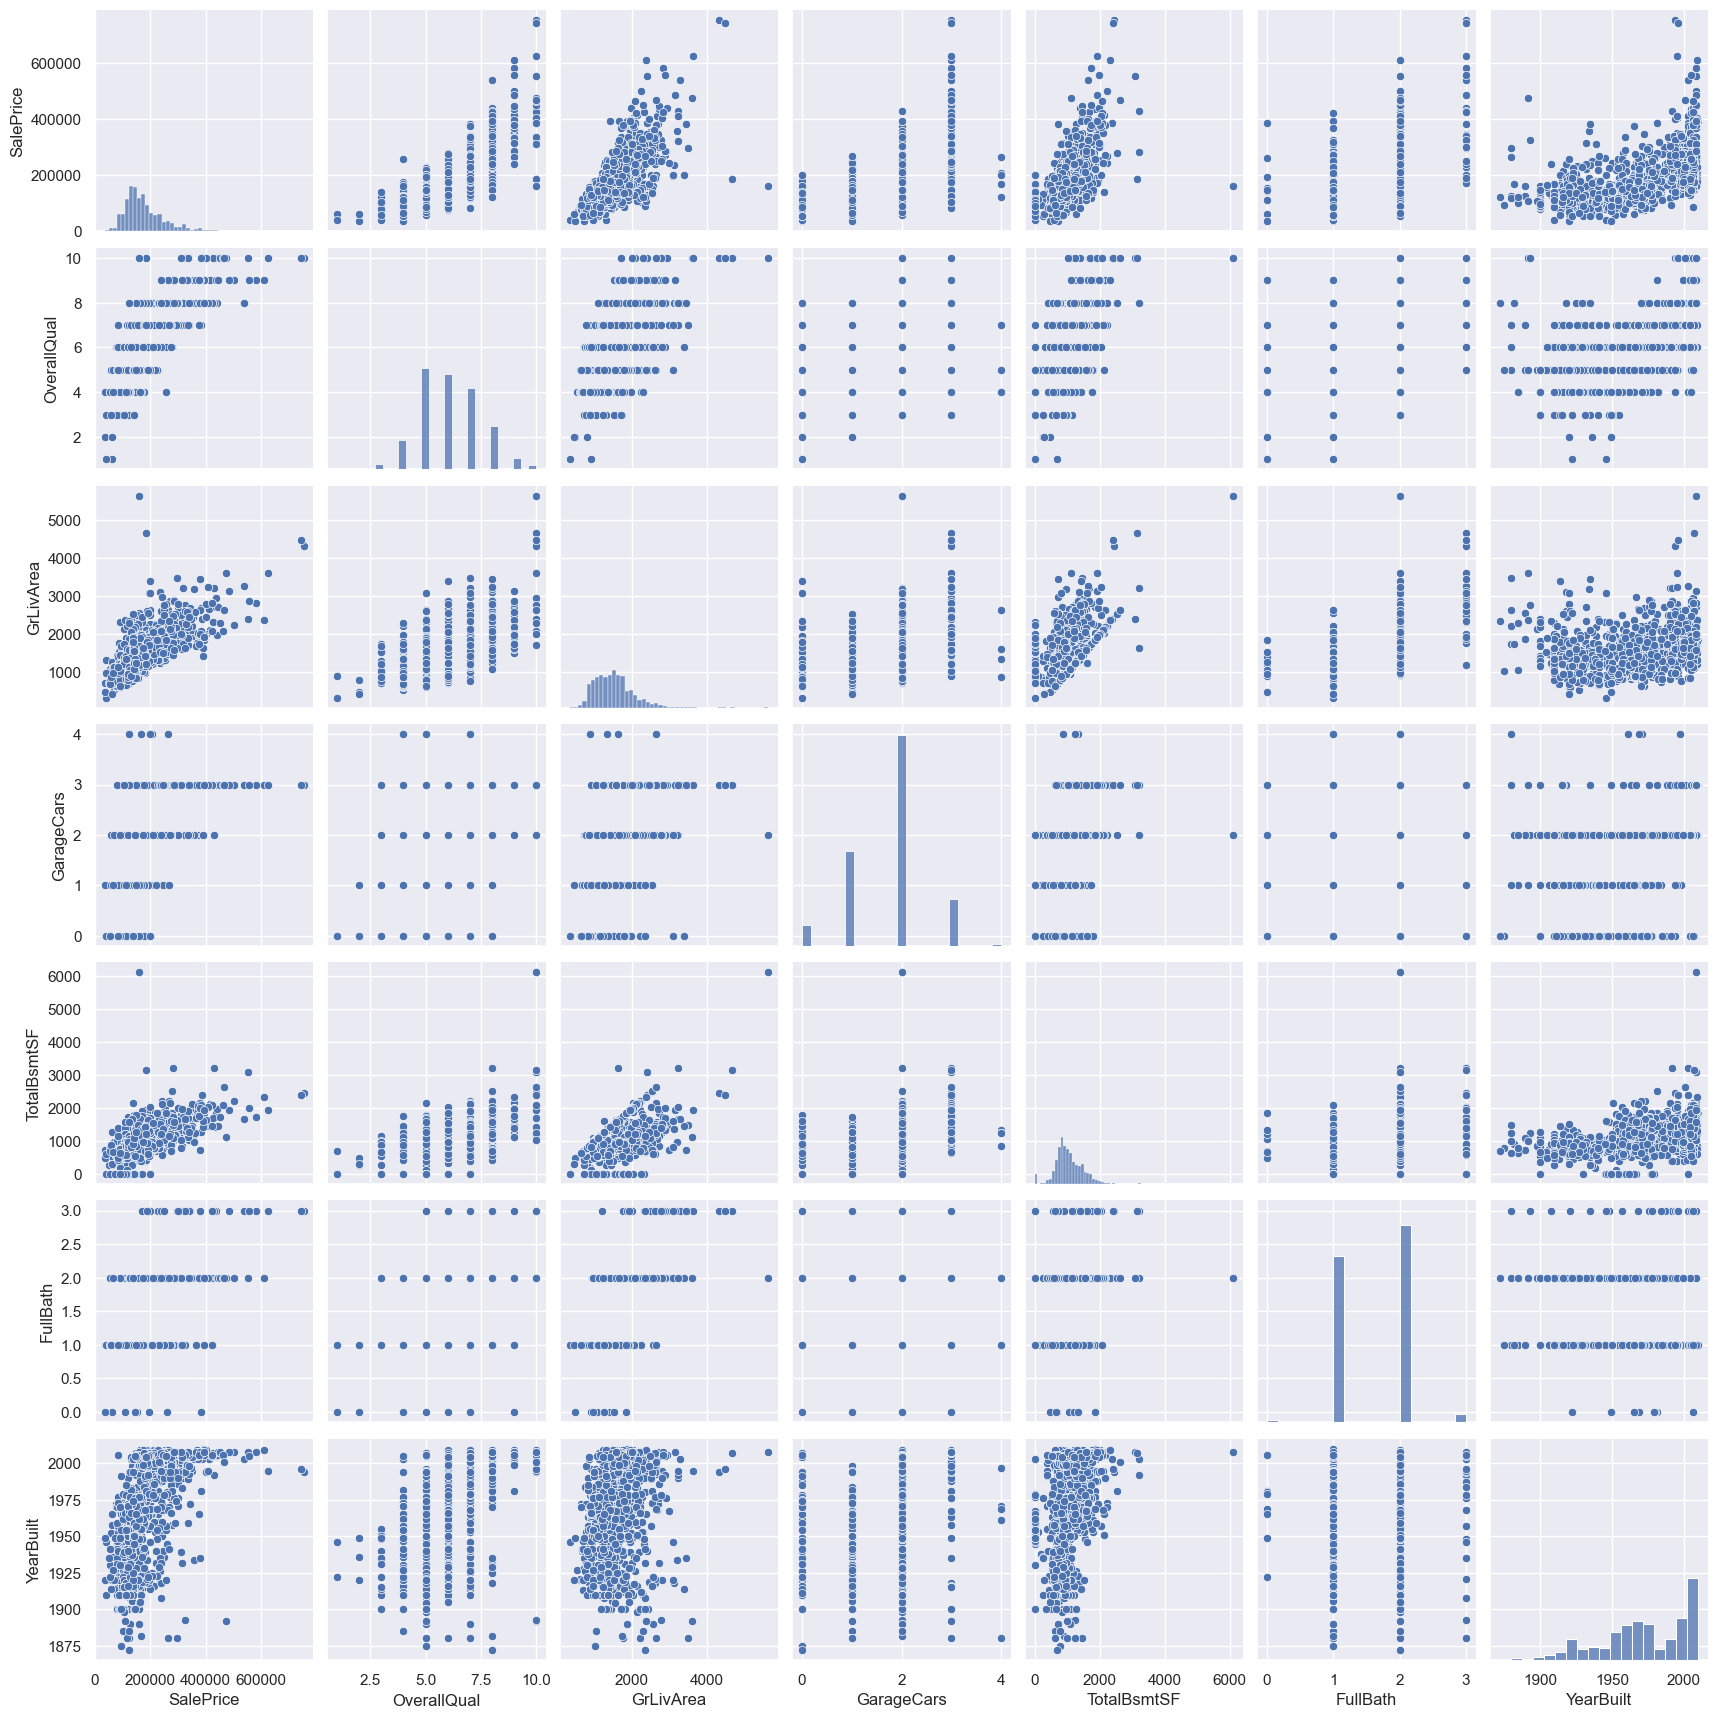

In [372]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5)
plt.show();

#Fix the Missing Data

In [373]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [374]:
##Convert NAN to none
null_vars= ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", 
            "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_vars:
    house[i].fillna("None", inplace=True)
    house[i].fillna("None", inplace=True)

In [375]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [376]:
# Check nulls once again

house.columns[house.isnull().any()] 

null_2 = house.isnull().sum()/len(house)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [377]:
##droping Lotfrontage as it has so many null values...

In [378]:
house.drop("LotFrontage", axis=1, inplace=True)

In [379]:
house = house.drop(['Id'], axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [380]:
#again check missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
MasVnrType,8,0.005479
Electrical,1,0.000685
GrLivArea,0,0.000000


GarageYrBlt, MasVnrArea, and MasVnrType missing values. MasVnrType is categorical replace with "None". And fill the others with median.

In [381]:
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["MasVnrType"].fillna("None", inplace=True)

In [382]:
# again checking missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
GarageCars,0,0.000000
GarageFinish,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000


Drop the one null row.

In [383]:
house.dropna(inplace=True)

In [384]:
#checking missing data again..
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
MSSubClass,0,0.0
KitchenAbvGr,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [385]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   Alley          1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

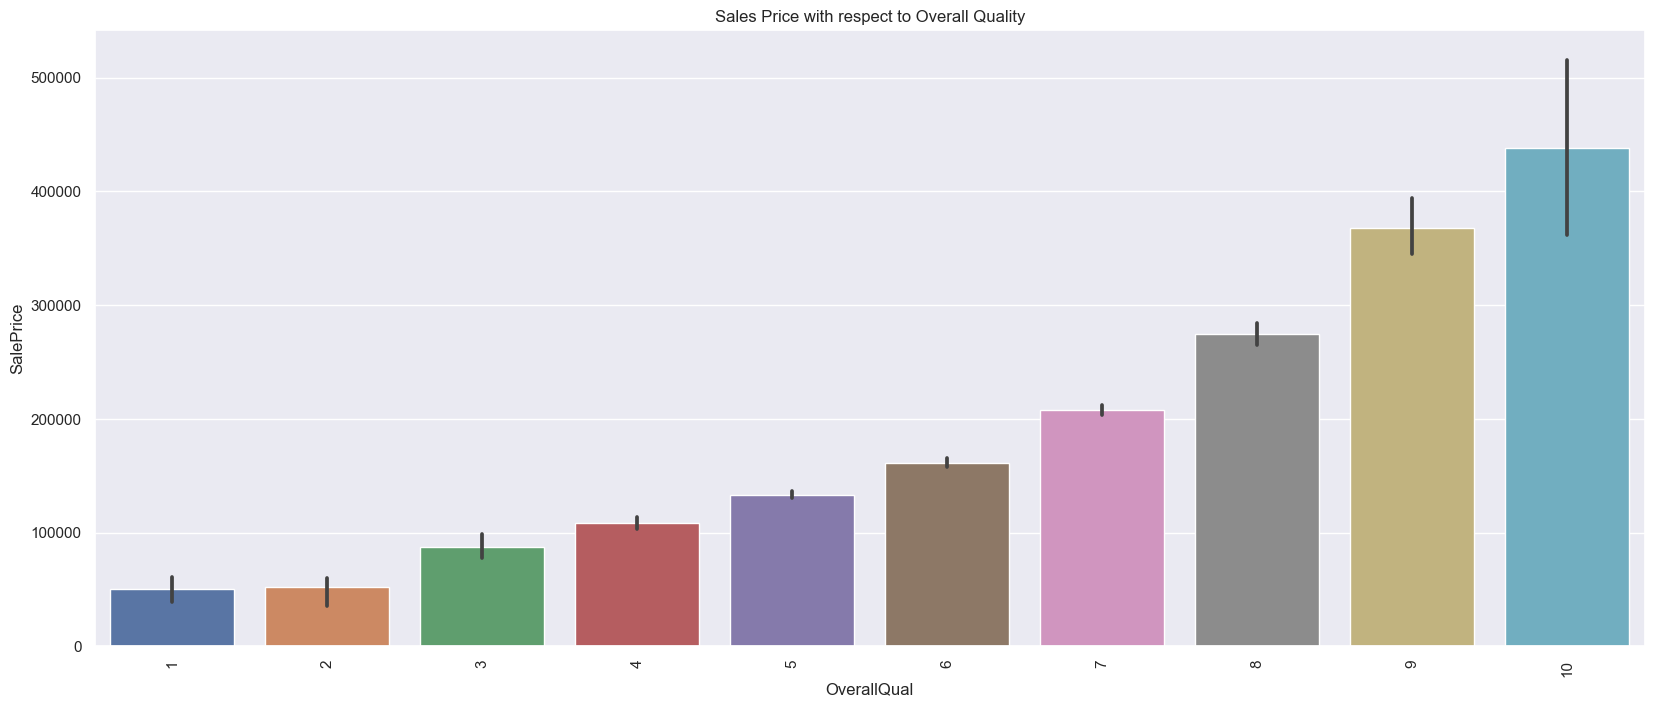

In [386]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

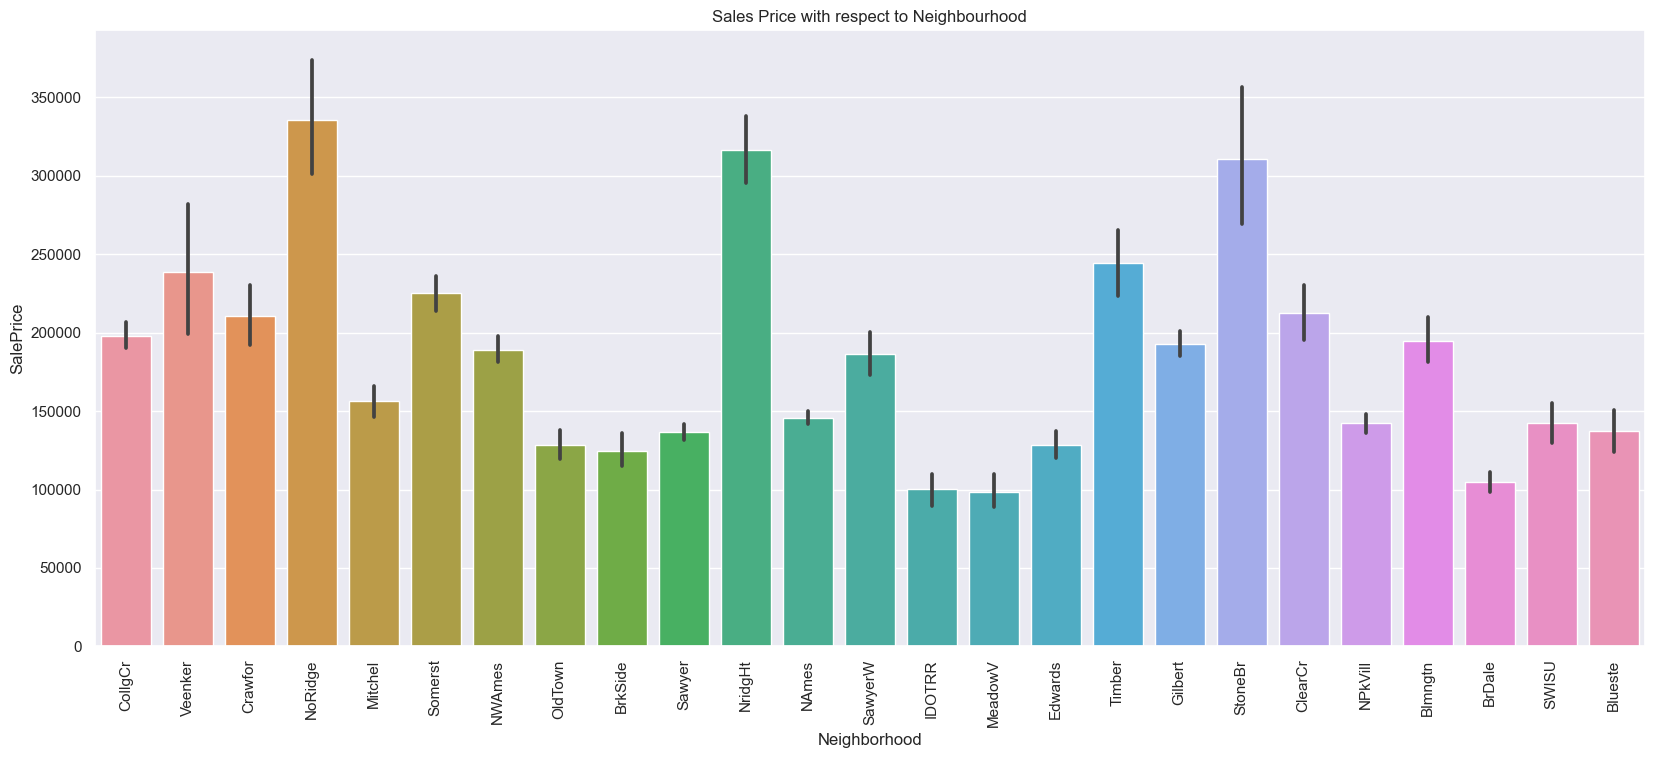

In [387]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= house)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

need to fix the data types

In [388]:
types_train = house.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [389]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      34
float64     2
Name: 0, dtype: int64

In [390]:
#we should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)

In [391]:
print(numerical_values_train)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [392]:
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Data Preparation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

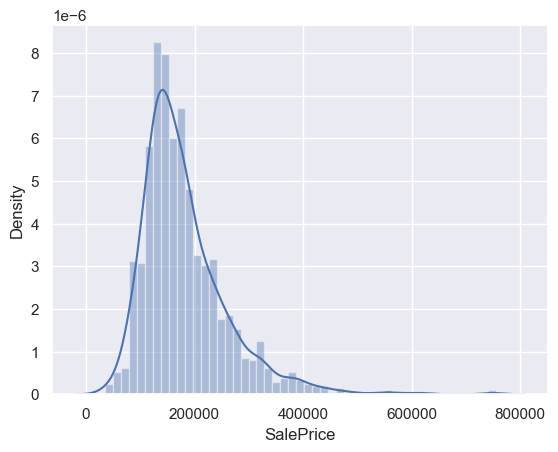

In [393]:
sns.distplot(house["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

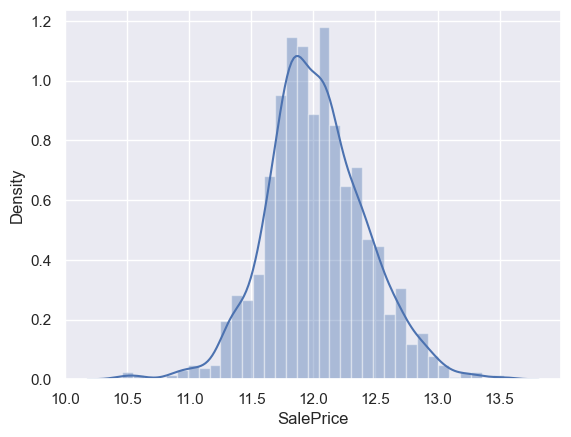

In [394]:
#becuase of high skewness need to do log..
sns.distplot(np.log(house["SalePrice"]))

In [395]:
house["TransformedPrice"] = np.log(house["SalePrice"])

In [396]:
for i in categorical_values_train:
    feature_set = set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i] == j, i] = feature_list.index(j)

In [397]:
house.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,60,2,8450,1,2,3,0,1,1,0,...,3,4,4,0,2,2008,8,3,208500,12.247694
1,20,2,9600,1,2,3,0,1,2,0,...,3,4,4,0,5,2007,8,3,181500,12.109011
2,60,2,11250,1,2,0,0,1,1,0,...,3,4,4,0,9,2008,8,3,223500,12.317167
3,70,2,9550,1,2,0,0,1,4,0,...,3,4,4,0,2,2006,8,0,140000,11.849398
4,60,2,14260,1,2,0,0,1,2,0,...,3,4,4,0,12,2008,8,3,250000,12.429216


In [398]:
##Now are ready to build model as Categorigal values changed to numbers

# Model Building

In [487]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(house[numerical_values_train]))
# Outlier Removed Records
selected = house[numerical_values_train][(z < 3).all(axis=1)]
df_data = house.loc[selected.index]
df_data

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,60,2,8450,1,2,3,0,1,1,0,...,3,4,4,0,2,2008,8,3,208500,12.247694
2,60,2,11250,1,2,0,0,1,1,0,...,3,4,4,0,9,2008,8,3,223500,12.317167
4,60,2,14260,1,2,0,0,1,2,0,...,3,4,4,0,12,2008,8,3,250000,12.429216
6,20,2,10084,1,2,3,0,1,1,0,...,3,4,4,0,8,2007,8,3,307000,12.634603
10,20,2,11200,1,2,3,0,1,1,0,...,3,4,4,0,2,2008,8,3,129500,11.771436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,0,3675,1,2,3,0,1,1,0,...,3,4,4,0,5,2006,8,3,145000,11.884489
1453,20,2,17217,1,2,3,0,1,1,0,...,3,4,4,0,7,2006,8,0,84500,11.344507
1454,20,4,7500,1,1,3,0,1,1,0,...,3,4,4,0,10,2009,8,3,185000,12.128111
1455,60,2,7917,1,2,3,0,1,1,0,...,3,4,4,0,8,2007,8,3,175000,12.072541


In [488]:
Xt = house.drop(["SalePrice", "TransformedPrice"], axis=1).values
yt = house["TransformedPrice"].values


In [492]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, yt, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=50)

In [493]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Predict Training R2")
print(lr.score(X_train,y_train))
print("Predict Testing R2")
print(lr.score(X_test,y_test))

Predict Training R2
0.9134337156611501
Predict Testing R2
0.8269627566959559


# Lasso and Ridge Regression
Let's now try predicting house prices and perform lasso and ridge regression.

In [494]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)
print("Training R2")
print(lasso.score(X_train,y_train))
print("Testing R2")
print(lasso.score(X_test,y_test))

Training R2
0.9010024899620391
Testing R2
0.8491024788990967


In [495]:
lasso.coef_

array([-4.25308567e-04,  3.15466736e-02,  1.71486146e-06,  0.00000000e+00,
        0.00000000e+00, -4.29258092e-03, -0.00000000e+00,  0.00000000e+00,
       -2.44575612e-03,  0.00000000e+00, -1.56827393e-03,  1.31126493e-02,
        0.00000000e+00, -1.33488034e-02,  6.75656304e-03,  6.64580069e-02,
        4.98600666e-02,  2.54889110e-03,  1.04108677e-03, -0.00000000e+00,
       -0.00000000e+00,  2.10039870e-03, -2.03826409e-03, -0.00000000e+00,
        3.68528250e-05,  3.79504594e-03, -3.70774082e-03,  1.16721254e-02,
        4.63454972e-03, -4.77887590e-03, -1.85110054e-02,  9.81034942e-03,
        1.51094379e-05, -1.35639308e-02,  8.86425894e-05, -9.84187853e-06,
        0.00000000e+00, -2.64796928e-03,  2.05518834e-03,  2.91418704e-02,
       -0.00000000e+00,  2.23059916e-04,  2.07780003e-04,  6.68709735e-05,
        3.12770845e-05,  3.60951263e-02,  0.00000000e+00,  1.12799426e-02,
        1.31641620e-03,  0.00000000e+00, -0.00000000e+00,  1.97430600e-02,
        1.13786039e-02,  

In [496]:
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [497]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.pipeline import Pipeline

In [498]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [499]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027210,0.017605,0.001149,2.963545e-04,0.0,{'alpha': 1e-08},0.810576,0.902728,0.546992,0.917936,...,0.810332,0.136708,7,0.924878,0.911785,0.930535,0.909832,0.918698,0.919146,0.007794
1,0.025987,0.017813,0.001222,3.917811e-04,0.0,{'alpha': 1e-07},0.810579,0.902730,0.547021,0.917936,...,0.810339,0.136697,6,0.924878,0.911785,0.930535,0.909832,0.918698,0.919146,0.007794
2,0.025504,0.018377,0.000800,4.001856e-04,0.000001,{'alpha': 1e-06},0.810600,0.902743,0.547315,0.917941,...,0.810409,0.136588,5,0.924878,0.911785,0.930535,0.909832,0.918698,0.919146,0.007794
3,0.024326,0.018770,0.001000,2.132481e-07,0.00001,{'alpha': 1e-05},0.810812,0.902879,0.550239,0.917991,...,0.811102,0.135501,4,0.924877,0.911784,0.930534,0.909831,0.918697,0.919144,0.007794
4,0.024042,0.019233,0.001001,3.814697e-07,0.0001,{'alpha': 0.0001},0.812900,0.904444,0.578547,0.918421,...,0.817854,0.125032,3,0.924761,0.911676,0.930422,0.909709,0.918580,0.919030,0.007795


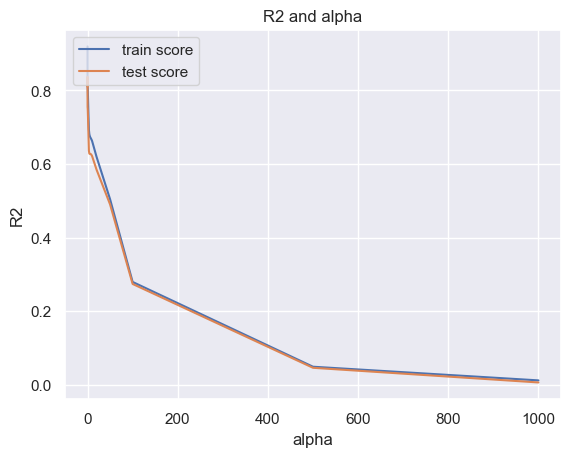

In [500]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.

In [501]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  3.98528109e-06,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.00157896e-04, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.94579173e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [502]:
# lasso regression
lm = Lasso(alpha=0.002)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9010024899620391
0.8491024788990967


In [503]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15656331540322382


In [233]:
#### The R2 values for Train and Test matches well, indicating an optimum model

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [504]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [505]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006363,1.471461e-03,0.001319,4.095544e-04,0.0,{'alpha': 1e-08},-0.094958,-0.085865,-0.102629,-0.093187,...,-0.093429,0.005528,27,-0.076787,-0.083414,-0.074888,-0.081141,-0.080609,-0.079368,0.003091
1,0.004402,8.003951e-04,0.001001,6.330883e-04,0.0,{'alpha': 1e-07},-0.094958,-0.085865,-0.102630,-0.093187,...,-0.093429,0.005528,29,-0.076787,-0.083414,-0.074888,-0.081141,-0.080609,-0.079368,0.003091
2,0.003149,2.945900e-04,0.000804,4.020604e-04,0.000001,{'alpha': 1e-06},-0.094958,-0.085865,-0.102630,-0.093187,...,-0.093429,0.005528,30,-0.076787,-0.083414,-0.074888,-0.081141,-0.080609,-0.079368,0.003091
3,0.003001,2.132481e-07,0.001000,1.784161e-07,0.00001,{'alpha': 1e-05},-0.094958,-0.085865,-0.102630,-0.093187,...,-0.093429,0.005528,28,-0.076788,-0.083414,-0.074888,-0.081141,-0.080609,-0.079368,0.003091
4,0.003407,4.854282e-04,0.001001,1.461955e-06,0.0001,{'alpha': 0.0001},-0.094957,-0.085865,-0.102629,-0.093187,...,-0.093429,0.005528,26,-0.076788,-0.083414,-0.074888,-0.081141,-0.080609,-0.079368,0.003091


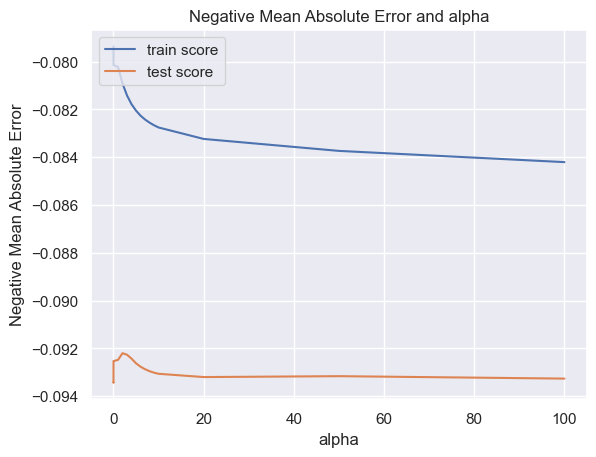

In [506]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [507]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.56545340e-04,  3.12002157e-02,  1.70786863e-06,  4.77819872e-02,
        3.27496293e-04, -5.35176673e-03, -3.62516290e-03,  4.82027582e-02,
       -2.84247004e-03,  8.34256154e-03, -1.23238841e-03,  1.42946023e-02,
        1.70387555e-02, -2.21502317e-02,  7.23554647e-03,  5.94772341e-02,
        5.37610041e-02,  1.94489487e-03,  7.92918149e-04, -8.17262008e-03,
       -1.00742256e-02,  3.47986019e-03, -3.04410775e-03, -1.77913381e-03,
        5.27481668e-05,  1.58736661e-02, -7.69918446e-03,  1.38894699e-02,
        1.17661445e-02, -7.73831357e-03, -1.89806221e-02,  1.07825294e-02,
       -1.27022641e-05, -1.46091478e-02,  6.41641662e-05, -2.48433640e-05,
        2.66185358e-05, -6.76624035e-03, -1.14809403e-04,  8.23053987e-02,
       -1.84673254e-02,  1.17347206e-04,  8.93336744e-05, -9.17413699e-05,
        1.14939648e-04,  5.60022565e-02,  1.60327042e-02,  3.59288682e-02,
        2.48772977e-02,  2.56459394e-03, -3.02291857e-02,  2.01712100e-02,
        1.45464417e-02,  

In [508]:
# ridge regression
lm = Ridge(alpha=3)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9096695046278602
0.8405237702760813


In [509]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.16095220714948266


It is visible that the model performance is better than Lasso. The train and the test scores are matching well

# Observation:
Model performance by Ridge Regression was better in terms of R2 values of Train and Test,
Better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
always advisable to use simple yet robust model.
Equation can be formulated using the features and coefficients obtained by Lasso

Higher values of negative coeeficients suggest a decrease in sale value.